**Title**

**Introduction**

This project utilizes data gathered by Frank Wood's research group in UBC computer science. Their research focused on video games and how people play videogames, specifically by creating a MineCraft server and collecting data from players. This data included information like demographics, as well as information about play on the server. They had three broader questions that they wanted to explore regarding information that would be important for running the project. My project aims to provide some answers relating to one of these questions using a model created from the provided data. 

The broader question that I chose to look at was what player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types. From this, I formed my question of: can the number of hours played and the age of a player predict the subscription status of a player in the players dataset?

The players dataset consists of descriptive information about players in a MineCraft server set up by the research group. There are 196 observations in the dataset and seven different variables for each observation. The variables are as follows: <br>
<br>
`experience` (chr) - how experienced a player is with MineCraft <br>
`subscribe` (lgl) - whether the player is subscribed to the MineCraft newsletter <br>
`hashed_email` (chr) - hashed/encrypted email of the player <br>
`played_hours` (dbl) - number of hours played on the server <br>
`name` (chr) - name of the player <br>
`gender` (chr) - gender the player identifies as <br>
`age` (dbl) - age of the player <br>
<br>
For `played_hours`, the range of observations was from 0.0hr to 223.1hr, and for `age` the range of observations was from 8 to 50. Upon initial observation of the dataset, there were no obvious issues with the data, although the column names had to be adjusted and `subscribe` was changed to a factor instead of a logical category. One potential concern that was considered was whether there would be enough data for both the true and false observations in subscription status to create a model. 

**Methods and Results**

Before starting to work with the data, I loaded in the necessary libraries for the wrangling and model that I wanted to do. These included tidyverse, tidymodels, themis, and janitor. Following that, I read in the data from the players dataset. Because it was a csv file, I was able to use the `read_csv` function. I loaded the data so I could look at it visually and see if there was anything I needed to tidy. I used the `clean_names` function to make all of the names lowercase and separated by underscores, and used the `mutate` function along with `as_factor` to change `subscribe` from a logical type to a factor type variable, since I knew that I would need that for my model. <br>
<br>
The model I aimed to make was a k nearest neighbors classification model. From the players data, the `age` and `played_hours` were both numeric, distance metrics so they would work as predictors. The classifier, `subscribe`, is a factor and has a set amount of observations. Based on this, the k nearest neighbors classification model seemed like at least a good starting point at creating a model to answer my question

In [1]:
#loading libraries

library(tidyverse)
library(tidymodels)
library(themis)
library(janitor)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# reading in data
options(repr.matrix.max.rows = 6)

minecraft <- read_csv("players.csv") |>
clean_names() |>
mutate(subscribe = as_factor(subscribe))
minecraft

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


After these initial tidying steps, the dataset was tidy and able to be worked with. For my model, I wanted to do a k nearest neighbors classification model with `subscribe` as the predicted variable and `played_hours` and `age` as the predictors. Since the other variables in the dataset were not necessary for my model, I used `select` to choose the three variables I needed.

In [3]:
#selecting for variables of interest
minecraft_small <- minecraft |>
    select(subscribe, played_hours, age) 
minecraft_small

subscribe,played_hours,age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
⋮,⋮,⋮
FALSE,0.0,17
FALSE,2.3,17
TRUE,0.2,NA


With the data tidy and containing only the necessary variables, I made a visualization so I could see what the data looked like and potentially spot any issues that I would need to consider when creating my model. Specifically, I wanted to get an idea of whether the data was balanced between the 'true' and 'false' observations in `subscribe`. I created a scatter plot with x as `age` and y as `played_hours`. To visualize the `subscribe` observations, I coloured the points.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


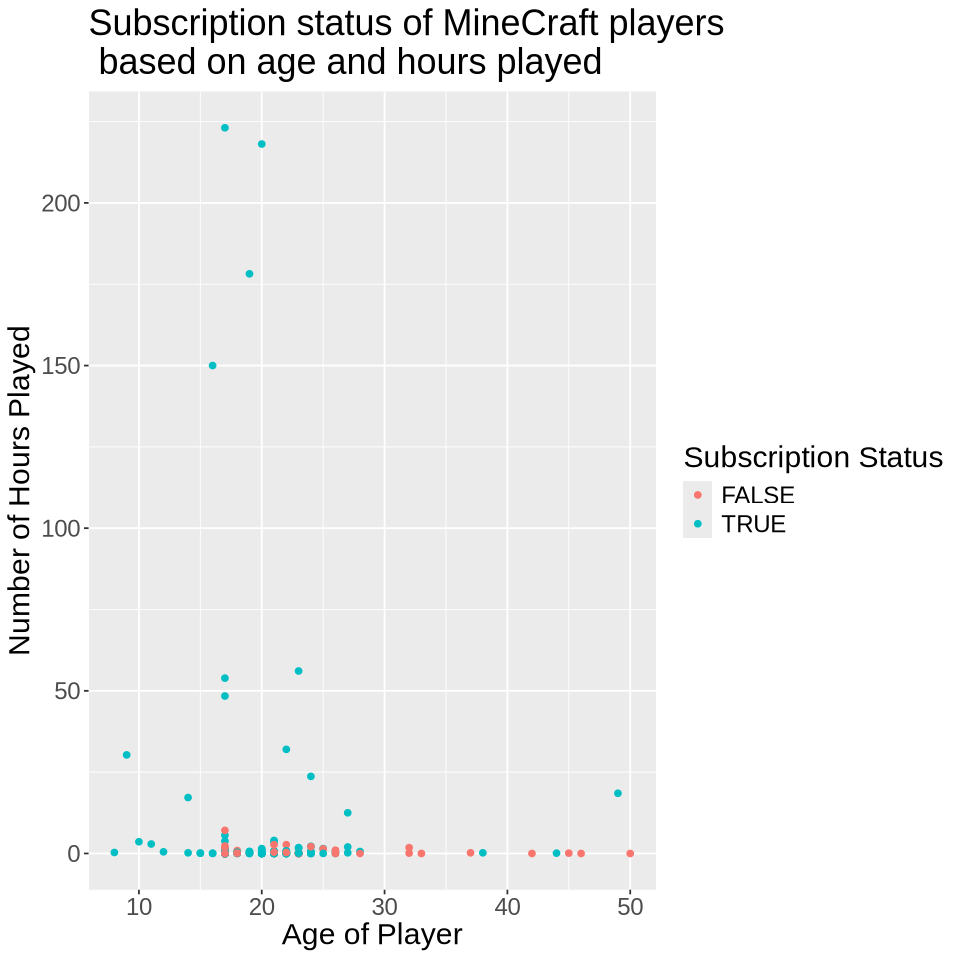

In [22]:
#creating an initial plot to visualize the data
options(repr.plot.height = 8, repr.plot.width = 8)

minecraft_plot <- ggplot(minecraft_small, aes(x = age, y = played_hours, color = subscribe)) +
    geom_point() +
    labs(x= "Age of Player", y = "Number of Hours Played", color = "Subscription Status") +
    theme(text= element_text(size = 18)) +
    ggtitle("Subscription status of MineCraft players \n based on age and hours played")
minecraft_plot

*Figure 1: Scatterplot showing the number of hours played on the MineCraft server compared to the age of the player. Subscription status is shown by colouring the points, with true being teal and false being red.*

Based on Figure 1, there appeared to be more 'true' observations compared to 'false' observations. This meant that when creating my model, I would need to double-check if the numbers were as unbalanced as they seemed from Figure 1, and then use the function `up_scale` to duplicate the data with the 'false' observation. If the two observations remained unequal, the k nearest neighbours model could end up assigning more data points as 'true' because there would be more potential neighbours that are 'true' compared to 'false'. <br>
<br>
Another thing I noted from figure 1, is that between the ages 17-27 and under 10 hours of playtime, there were a lot of points of both `subscribe` observations. This could potentially mean that the k nearest neighbours model would be less effective in that area, resulting in lower metrics like accuracy. I still decided to try the k nearest neighbours model to see how it would actually perform. <br>
<br>
Finally, from the visual, it was clear that scaling would need to be done since `age` has a lot less variability in its scale compared to `played_hours`. Without scaling, `hours_played` would have a bigger weight in the model's neighbour assignment.

Before creating the model, I needed to split the data into a training and testing set. I chose to go with a 75% training and 25% testing split. The model was fully created using the training set, in order to prevent it from looking more accurate than it actually is when testing it. I did not create a specific validation set, but I did use cross-validation with 5 folds to help with tuning.

In [5]:
#splitting data into training data and testing data
set.seed(9999)

minecraft_split <- initial_split(minecraft_small, prop = 0.75, strata = subscribe)  
minecraft_train <- training(minecraft_split)   
minecraft_test <- testing(minecraft_split)

minecraft_train

subscribe,played_hours,age
<fct>,<dbl>,<dbl>
FALSE,0,17
FALSE,0,21
FALSE,0,22
⋮,⋮,⋮
TRUE,0.0,20
TRUE,0.0,17
TRUE,0.2,NA


As stated previously, the `subscribe` observations appeared to have different numbers of observations. To double-check this, I used the `group_by` and `summarize` functions with `count`. As expected, the 'true' observation had a higher count than the 'false' observation. To adjust this, I used the `step_upsample` function, and then checked the counts again in order to confirm that they were now even. 

In [6]:
#figuring out how many of each category we have
counts <- minecraft_train |>
    group_by(subscribe) |>
    summarize(count = n())

counts

subscribe,count
<fct>,<int>
FALSE,39
TRUE,108


In [25]:
#adjusting amount of data in the false category to make the two categories even
minecraft_train_even <- recipe(subscribe ~ age + played_hours, data = minecraft_train) |>
  step_upsample(subscribe, over_ratio = 1, skip = FALSE) |>
  prep() |>
  bake(minecraft_train)
minecraft_train_even


age,played_hours,subscribe
<dbl>,<dbl>,<fct>
17,0.1,FALSE
17,0.0,FALSE
17,0.1,FALSE
⋮,⋮,⋮
20,0.0,TRUE
17,0.0,TRUE
NA,0.2,TRUE


In [8]:
#checking that the counts are even
counts_adjusted <- minecraft_train_even |>
    group_by(subscribe) |>
    summarize(count = n())

counts_adjusted

subscribe,count
<fct>,<int>
FALSE,108
TRUE,108


With the counts even, I started to make the model by creating a recipe. The classifier was set as `subscribe` and the predictors were `age` and `played_hours`. I used `step_scale` and `step_center` for all predictors to combat the concern about one variable having more weight in which neighbours were chosen than the other. <br>
<br>
Next, I created the model specification using `nearest_neighbor` with the engine "kknn" and the mode as "classification", since that is the type of problem my question is. For the number of neighbors, I set it as `tune` because to hopefully make the model more accurate, I wanted to figure out what the best number of neighbours would be by tuning the model. 

In [9]:
#making a recipe
minecraft_recipe <- recipe(subscribe ~ age + played_hours, data = minecraft_train_even) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
minecraft_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [10]:
#making the model specification
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


As stated earlier, I wanted to perform a cross-validation with 5 folds, so I created those folds using `vfold_cv`. As well for the tuning, I created a tibble with the values of neighbors I wanted to test, which was from 1 to 8. Based on the inital visualization of the data, this range seemed reasonable for testing which value would be best. Then I created a workflow, that I then tuned using the `tune_grid` function. To figure out the best k value, I needed the accuracy of each k, so I used the `collect_metrics` function to provide this. 

In [11]:
#making cross validation information and workflow

minecraft_vfold <- vfold_cv(minecraft_train_even, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 8, by = 1))

knn_workflow <- workflow() |>
      add_recipe(minecraft_recipe) |>
      add_model(knn_tune)
knn_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [12]:
#collecting metrics for the workflow to figure out which k value is best
minecraft_results <- knn_workflow|>
    tune_grid(resamples = minecraft_vfold, grid = k_vals) |>
    collect_metrics()
minecraft_results

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 43 rows.
               ✖ Assigned data has 44 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 44 to size 43.

There were issues with some computations   A: x1

There were issues with some computations   A: x2





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7489177,3,0.03726047,Preprocessor1_Model1
1,roc_auc,binary,0.7489177,3,0.03726047,Preprocessor1_Model1
2,accuracy,binary,0.7496392,3,0.01795073,Preprocessor1_Model2
⋮,⋮,⋮,⋮,⋮,⋮,⋮
7,roc_auc,binary,0.6881875,3,0.03726701,Preprocessor1_Model7
8,accuracy,binary,0.6471861,3,0.04062888,Preprocessor1_Model8
8,roc_auc,binary,0.6803767,3,0.04272903,Preprocessor1_Model8


From the `collect_metrics` output, I filtered the `.metric` variable for accuracy, since that is what I needed to figure out the best k. From here, I could have arranged the data or used the `slice_max` function to get the largest mean, which would indicate the best accuracy. However, I decided to plot the means for all of the tested values of k to create a visual repesentation of the best k values. 

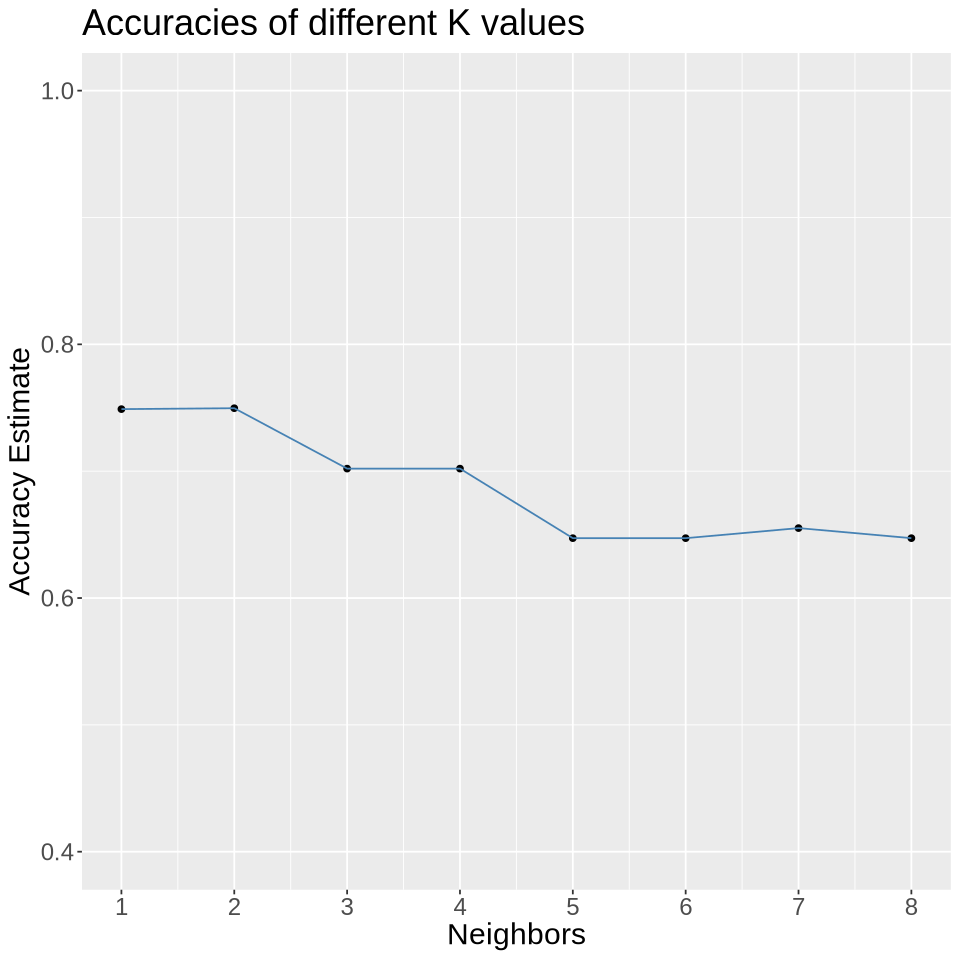

In [24]:
#plotting the number of neighbours and accuracy of the model to figure out how many neighbors is best
accuracies <- minecraft_results |> 
      filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line(color = 'steelblue') +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  
      scale_y_continuous(limits = c(0.4, 1.0)) +
    theme(text = element_text(size = 18)) +
    ggtitle("Accuracies of different K values")
accuracy_versus_k

*Figure 2: A line plot showing the accuracy estimate of the model depending on the value of k, which represents the number of neighbours.*

When creating this visual, I expected there to be a peak and after the peak, as the k values continued to increase, I expected the accuracy estimate to decrease. The plot, Figure 2, generally follows this expectation, since there is a higher point at 2 neighbors, and the remaining neighbors generally decreased in accuracy. Since 2 was the highest accuracy, this was the number of neighbours I chose to go with. Interestingly, the accuracy value for 1 neighbor was very close to 2 neighbors, which is not something that I expected to happen. <br>
<br>
With the number of neighbors chosen as 2, I made another model specification, followed by another workflow to which I fit the training data with the even amounts of 'true' and 'false'. 

In [14]:
#creating a new model specification with the select number of neighbours
#creating a new workflow

minecraft_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
         set_engine("kknn") |>
         set_mode("classification")

minecraft_best_fit <- workflow() |>
         add_recipe(minecraft_recipe) |>
         add_model(minecraft_best_spec) |>
         fit(data = minecraft_train_even)
minecraft_best_fit


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(2,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2943925
Best kernel: rectangular
Best k: 2

With the model created, I then used the `predict` function with the testing data that had been previously set aside. The `bind_cols` function was used so that the predicted and actual values were in one dataset. 

In [15]:
#using the model on the testing data
minecraft_prediction <- minecraft_best_fit |>
          predict(minecraft_test) |>
          bind_cols(minecraft_test) 
minecraft_prediction


.pred_class,subscribe,played_hours,age
<fct>,<fct>,<dbl>,<dbl>
TRUE,TRUE,0.1,21
FALSE,TRUE,0.0,17
TRUE,TRUE,0.0,19
⋮,⋮,⋮,⋮
TRUE,FALSE,0.2,17
FALSE,TRUE,0.1,44
FALSE,TRUE,0.0,17


In order to figure out how well the model was performing, I chose to look at the accuracy, precision, and recall. Just looking at the accuracy would not necessarily provide the best understanding of how the model was working, since it wouldn't be clear where mistakes were occuring. <br>
<br>
I started with accuracy. Using the `metrics` function, I set the truth as `subscribe` and the estimate as `.pred_class`. This provided a value of 0.408 for the accuracy, or 40.8%. This is not great, since it means that the model is predicting correctly less than half of the time. 

In [16]:
#figuring out accuracy of the model

minecraft_accuracy <- minecraft_prediction |>
    metrics(truth = subscribe, estimate = .pred_class)
minecraft_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.4081633
kap,binary,-0.1092896


For figuring out the precision and recall, I first created a confusion matrix with the `conf_mat` function. Again, truth was set as `subscribe` and estimate was set as `.pred_class`.

In [17]:
#creating a confusion matrix
minecraft_mat <- minecraft_prediction |> 
      conf_mat(truth = subscribe, estimate = .pred_class)
minecraft_mat

          Truth
Prediction FALSE TRUE
     FALSE     6   22
     TRUE      7   14

I decided to set `true` as the positive element, since the researchers are more interested in knowing who is subscribed and their characteristics. For the precision calculation, I used the formula $$(# correct positive predictions)/(# total positive predictions)$$ For the recall calculation, I used the formula $$(# correct positive predictions)/(# total truly positive observations)$$
For `true`, the precision was 66.7% and the recall was 38.9%. <br>
<br>
These values suggest that the model has okay precision in regards to `true`, but is not great at recall.

In [18]:
#calculating recall and precision for true
true_precision <- 14/(7+14) *100
true_precision

true_recall <- 14/(22+14)*100
true_recall

[1] 66.66667

[1] 38.88889

In [19]:
# #calculating recall and precision for false
# false_precision <- 6/(28) *100
# false_precision

# false_recall <- 6/(6+7)*100
# false_recall
# maybe don't include since likely would be more interested in knowing if people are subscribed for recruitment efforts (ie true is positive)

**Discussion**